# Mini projects

You can do the projects in any order, just choose the ones that you like the most

### Cars detector

1. Create a classifier to detect cars in an image
1. If at least one car was detected write Car Detected (in Green) on top of the image, otherwise write No car detected (in Red)
1. Save the image to disk
1. Show the image result inside the notebook
1. Make it work with a video
1. Put a bounding box around the cars detected
1. Get a higher resolution video and extract the car plates and save them to disk

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


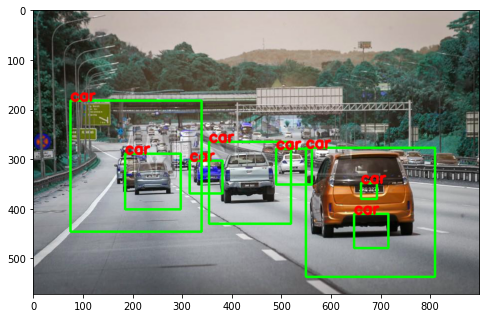

In [5]:

img = cv2.imread('img/cars3.jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

cars = classifier.detectMultiScale(gray_img)

for x,y,w,h in cars:
    rect = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
    cv2.boundingRect(gray_img)
    cv2.putText(img,'car',(x,y),cv2.FONT_ITALIC,1,(255,0,0),3,cv2.LINE_AA)
plt.figure(figsize= (8,8))
plt.imshow(img)


In [3]:

capture = cv2.VideoCapture('videos/video.avi')
classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

while(capture.isOpened()):
    _,frame = capture.read()
    gray_img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cars = classifier.detectMultiScale(gray_img)
    
    for x,y,w,h in cars:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
        cv2.putText(img,'car',(x,y),cv2.FONT_ITALIC,1,(255,0,0),3,cv2.LINE_AA)
    cv2.imshow('my_window',frame)
    if cv2.waitKey() & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()
        


### Sudoku Solver

1. Create function that given an image of a Sudoku game crops and extracts each cell 
1. Extract the number from each cropped cell (if blank extract it as 0)
1. Place the extracted numbers in an array (each block of 9 numbers is one array)
1. Apply the sudoku solver to the array to get the solution
1. Write the solution numbers in the cells

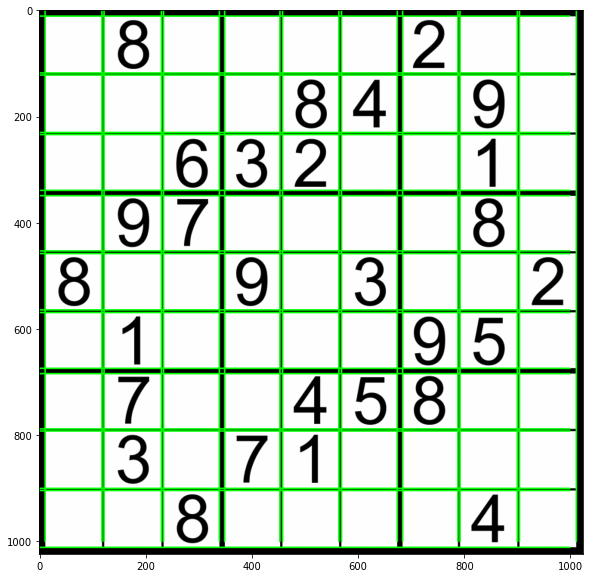

In [10]:
plt.figure(figsize = (10,10))
def sudoku(image):
    img = cv2.imread(image)
    edges = cv2.Canny(img,127,255)
    lines = cv2.HoughLines(edges,1,np.pi/180,200)
    for line in lines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho 
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    return plt.imshow(img) 

sudoku('img/sudoku.jpg')
            